In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import statsmodels.api as sm

In [5]:
# Load the data
player_data = pd.read_csv('./data/players.csv')
salary_data = pd.read_csv('./data/salaries_1985to2018.csv')

In [54]:
print(player_data.head())
print(player_data.columns)

   index        _id         birthDate              birthPlace  career_AST  \
0      0  abdelal01     June 24, 1968            Cairo, Egypt         0.3   
1      1  abdulza01     April 7, 1946      Brooklyn, New York         1.2   
2      2  abdulka01    April 16, 1947      New York, New York         3.6   
3      3  abdulma02     March 9, 1969   Gulfport, Mississippi         3.5   
4      4  abdulta01  November 3, 1974  Maisons Alfort, France         1.1   

  career_FG% career_FG3% career_FT%  career_G career_PER  ...    draft_pick  \
0       50.2         0.0       70.1       256       13.0  ...  25th overall   
1       42.8         NaN       72.8       505       15.1  ...   5th overall   
2       55.9         5.6       72.1      1560       24.6  ...   1st overall   
3       44.2        35.4       90.5       586       15.4  ...   3rd overall   
4       41.7        23.7       70.3       236       11.4  ...  11th overall   

  draft_round              draft_team draft_year height  \
0  

In [46]:
vals = player_data["career_FG%"].value_counts()
inds = [val for val in vals.index]
inds.sort()
print(inds)

['-', '0.0', '10.0', '100.0', '11.1', '12.0', '12.2', '12.5', '12.9', '13.3', '13.6', '13.8', '14.3', '14.8', '15.0', '15.2', '15.4', '15.6', '15.8', '16.7', '17.4', '17.6', '18.2', '18.5', '18.8', '19.0', '19.2', '19.3', '19.4', '19.6', '19.7', '19.8', '19.9', '20.0', '20.2', '20.4', '20.5', '20.6', '20.7', '20.8', '20.9', '21.0', '21.1', '21.2', '21.4', '21.6', '21.8', '21.9', '22.0', '22.2', '22.3', '22.4', '22.5', '22.6', '22.7', '22.8', '22.9', '23.1', '23.2', '23.4', '23.5', '23.6', '23.7', '23.8', '23.9', '24.0', '24.1', '24.2', '24.4', '24.6', '24.7', '24.8', '24.9', '25.0', '25.1', '25.2', '25.3', '25.4', '25.5', '25.6', '25.7', '25.8', '25.9', '26.0', '26.1', '26.2', '26.3', '26.5', '26.6', '26.7', '26.8', '26.9', '27.0', '27.1', '27.2', '27.3', '27.4', '27.5', '27.6', '27.7', '27.8', '27.9', '28.0', '28.1', '28.2', '28.3', '28.4', '28.5', '28.6', '28.8', '28.9', '29.0', '29.1', '29.2', '29.3', '29.4', '29.5', '29.6', '29.7', '29.8', '29.9', '30.0', '30.1', '30.2', '30.3', '3

In [57]:
filtered_player_data = player_data[(player_data["career_FG%"] != '-') & (player_data["career_TRB"]!= '-')]

In [7]:
salary_data.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


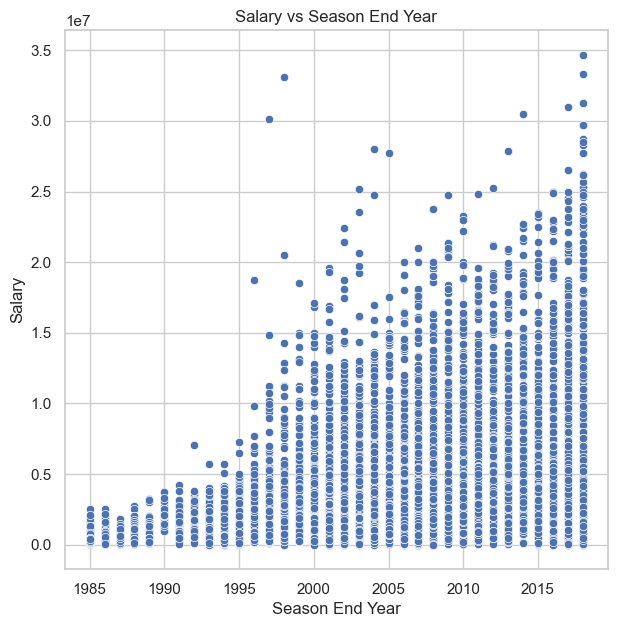

In [58]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x = salary_data["season_end"], y = salary_data["salary"])
ax.set_xlabel("Season End Year")
ax.set_ylabel("Salary")
ax.set_title("Salary vs Season End Year")
plt.show()

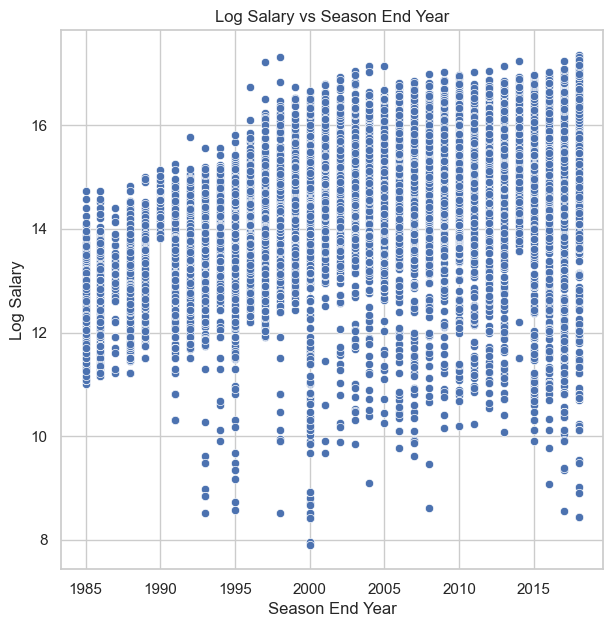

In [59]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x = salary_data["season_end"], y = np.log(salary_data["salary"]))
ax.set_xlabel("Season End Year")
ax.set_ylabel("Log Salary")
ax.set_title("Log Salary vs Season End Year")
plt.show()

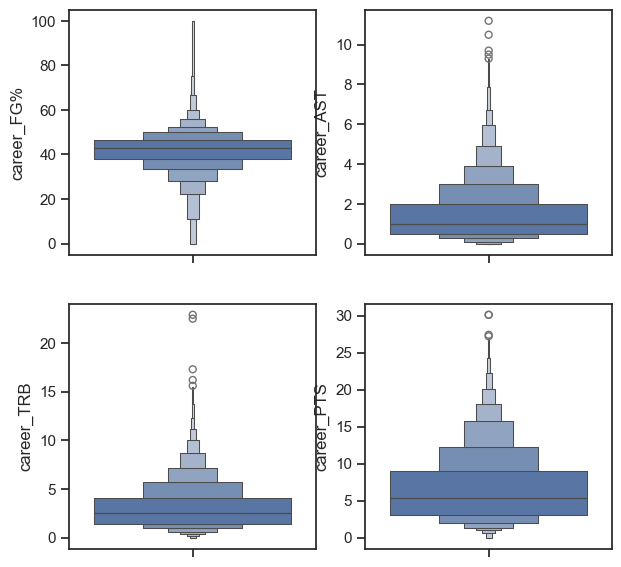

In [60]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.boxenplot(filtered_player_data["career_FG%"].astype(float), ax = axes[0, 0])
sns.boxenplot(filtered_player_data["career_AST"].astype(float), ax = axes[0, 1])
sns.boxenplot(filtered_player_data["career_TRB"].astype(float), ax = axes[1, 0])
sns.boxenplot(filtered_player_data["career_PTS"].astype(float), ax = axes[1, 1])

plt.show()

In [64]:
career_earnings = salary_data[["player_id", "salary"]].groupby("player_id").sum()
career_earnings.head()

,salary
player_id,
abdelal01,2844000
abdulka01,8560000
abdulma02,19849500
abdulta01,37982800
abdursh01,95866000


In [70]:
career_player_data = player_data.join(career_earnings, on="_id")
career_player_data["draft_pick"].head()

0    25th overall
1     5th overall
2     1st overall
3     3rd overall
4    11th overall
Name: draft_pick, dtype: object

In [93]:
career_player_data["draft_pick_num"] = career_player_data["draft_pick"].replace(r"\D+", "", regex=True)
career_player_data = career_player_data[career_player_data["draft_pick_num"].notna()]

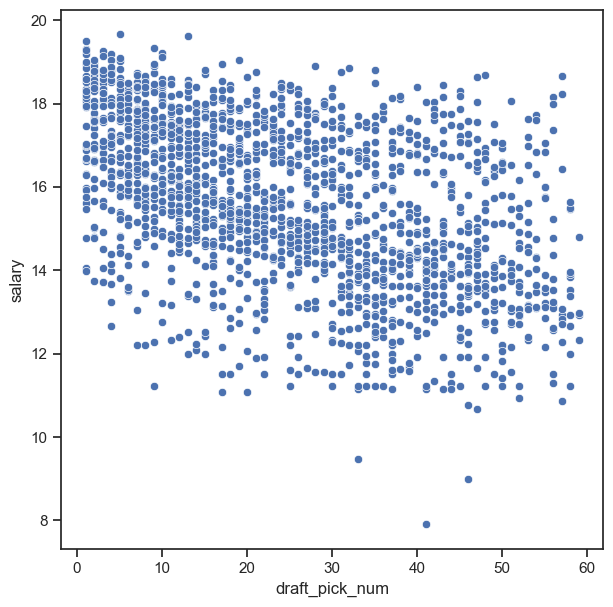

In [103]:
sns.set_theme(style="ticks")
f, axes = plt.subplots(figsize=(7, 7))
sns.scatterplot(x = career_player_data[career_player_data["draft_pick_num"].astype("int") < 60]["draft_pick_num"].astype("int"), y = np.log(career_player_data["salary"]))

plt.show()

In [99]:
print(career_player_data[career_player_data["draft_pick_num"].astype(int) > 200].to_string())

      index        _id       birthDate        birthPlace  career_AST career_FG% career_FG3% career_FT%  career_G career_PER  career_PTS career_TRB career_WS career_eFG%                 college     draft_pick draft_round    draft_team draft_year height                    highSchool            name                         position shoots weight   salary draft_pick_num
4479   4479  wilkida01  March 18, 1960  Pocatello, Idaho         0.2       25.0         0.0       85.7        12       -1.3         1.2        0.3      -0.1        25.0  Idaho State University  221st overall  10th round  Phoenix Suns       1982   6-10  Highland in Pocatello, Idaho  Dale Wilkinson  Power Forward and Small Forward  Right  220lb  70000.0            221


In [211]:
game_details = pd.read_csv("./data/ds_2/games_details.csv")

/var/folders/1x/qwgzcdxx77b5r5q3qnq469d80000gn/T/ipykernel_70814/2946036724.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  game_details = pd.read_csv("./data/ds_2/games_details.csv")


In [212]:
game_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [213]:
games_list = pd.read_csv("./data/ds_2/games.csv")
games_list.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [214]:
games = games_list[["GAME_ID", "SEASON", "GAME_DATE_EST"]]
games.set_index("GAME_ID", inplace=True)
games.head()

,SEASON,GAME_DATE_EST
GAME_ID,,
22200477,2022,2022-12-22
22200478,2022,2022-12-22
22200466,2022,2022-12-21
22200467,2022,2022-12-21
22200468,2022,2022-12-21


In [215]:
game_details = game_details.join(games, on="GAME_ID")
game_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,GAME_DATE_EST
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022,2022-12-22
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022,2022-12-22
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022,2022-12-22
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022,2022-12-22
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022,2022-12-22


In [216]:
# filter games to only be regular seaon
regular_seasons = {
    2003: ('2003-10-28', '2004-04-14'),
    2004: ('2004-11-02', '2005-04-20'),
    2005: ('2005-11-01', '2006-04-19'),
    2006: ('2006-10-31', '2007-04-18'),
    2007: ('2007-10-30', '2008-04-16'),
    2008: ('2008-10-28', '2009-04-16'),
    2009: ('2009-10-27', '2010-04-14'),
    2010: ('2010-10-26', '2011-04-13'),
    2011: ('2011-12-25', '2012-04-26'),  # Lockout season
    2012: ('2012-10-30', '2013-04-17'),
    2013: ('2013-10-29', '2014-04-16'),
    2014: ('2014-10-28', '2015-04-15'),
    2015: ('2015-10-27', '2016-04-13'),
    2016: ('2016-10-25', '2017-04-12'),
    2017: ('2017-10-17', '2018-04-11'),
    2018: ('2018-10-16', '2019-04-10'),
}

game_details['GAME_DATE_EST'] = pd.to_datetime(game_details['GAME_DATE_EST'])
mask = pd.Series(False, index=game_details.index)
    
for season, (start, end) in regular_seasons.items():
    season_mask = (game_details['GAME_DATE_EST'] >= start) & (game_details['GAME_DATE_EST'] <= end)
    mask |= season_mask


game_details = game_details[mask]

print(game_details.head())

         GAME_ID     TEAM_ID TEAM_ABBREVIATION   TEAM_CITY  PLAYER_ID  \
108935  20801225  1610612751               NJN  New Jersey     201583   
108936  20801225  1610612751               NJN  New Jersey       2239   
108937  20801225  1610612751               NJN  New Jersey     201572   
108938  20801225  1610612751               NJN  New Jersey       2039   
108939  20801225  1610612751               NJN  New Jersey     201604   

                  PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  \
108935          Ryan Anderson      NaN              F     NaN  32:14  ...   
108936        Trenton Hassell      NaN              F     NaN  16:18  ...   
108937            Brook Lopez      NaN              C     NaN  29:42  ...   
108938          Keyon Dooling      NaN              G     NaN  25:37  ...   
108939  Chris Douglas-Roberts      NaN              G     NaN  44:22  ...   

         REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  SEASON  GAME_DATE_EST  
108935  11.0  0.0

In [223]:
# convert minutes played to seconds for aggregation purposes
game_details["SEC"] = game_details["MIN"].apply(lambda t: int(t.split(":")[0])*60 + int(t.split(":")[1]) if pd.notna(t) else None)

In [259]:
# cumulative aggregation of stats across seasons
sum_season = game_details.groupby(["PLAYER_ID", "PLAYER_NAME", "SEASON"]).agg(
    SEC = ("SEC", "sum"),
    FGM = ("FGM", "sum"),
    FGA = ("PTS", "sum"),
    FG_PCT = ("FG_PCT", "mean"),
    FG3M = ("FG3M", "sum"),
    FG3A = ("FG3A", "sum"),
    FG3_PCT = ("FG3_PCT", "mean"),
    FTM = ("FTM", "sum"),
    FTA = ("FTA", "sum"),
    FT_PCT = ("FT_PCT", "mean"),
    OREB = ("OREB", "sum"),
    DREB = ("DREB", "sum"),
    REB = ("REB", "sum"),
    AST = ("AST", "sum"),
    STL = ("STL", "sum"),
    BLK = ("BLK", "sum"),
    TO = ("TO", "sum"),
    PF = ("PF", "sum"),
    PTS = ("PTS", "sum"),
    PLUS_MINUS = ("PLUS_MINUS", "mean"),
    G = ("PTS", "count")
)
sum_season = sum_season.reset_index()
sum_season.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEC,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,G
0,15,Eric Piatkowski,2003,42125.0,72.0,201.0,0.350837,43.0,122.0,0.315367,...,63.0,73.0,26.0,16.0,5.0,29.0,42.0,201.0,-0.285714,49
1,15,Eric Piatkowski,2004,50351.0,111.0,324.0,0.358426,57.0,134.0,0.276985,...,64.0,79.0,51.0,29.0,1.0,37.0,67.0,324.0,0.205882,68
2,15,Eric Piatkowski,2005,13694.0,24.0,59.0,0.242828,9.0,33.0,0.141379,...,19.0,23.0,13.0,6.0,1.0,11.0,20.0,59.0,0.689655,29
3,15,Eric Piatkowski,2006,4368.0,9.0,27.0,0.267636,7.0,18.0,0.246182,...,7.0,9.0,4.0,0.0,1.0,5.0,6.0,27.0,-0.272727,11
4,15,Eric Piatkowski,2007,6760.0,12.0,39.0,0.314563,11.0,26.0,0.363563,...,11.0,12.0,10.0,0.0,1.0,6.0,11.0,39.0,-2.062500,16


In [255]:
# per game aggregation of stats across seasons
mean_season = game_details.groupby(["PLAYER_ID", "PLAYER_NAME", "SEASON"]).agg(
    SEC = ("SEC", "mean"),
    FGM = ("FGM", "mean"),
    FGA = ("PTS", "mean"),
    FG_PCT = ("FG_PCT", "mean"),
    FG3M = ("FG3M", "mean"),
    FG3A = ("FG3A", "mean"),
    FG3_PCT = ("FG3_PCT", "mean"),
    FTM = ("FTM", "mean"),
    FTA = ("FTA", "mean"),
    FT_PCT = ("FT_PCT", "mean"),
    OREB = ("OREB", "mean"),
    DREB = ("DREB", "mean"),
    REB = ("REB", "mean"),
    AST = ("AST", "mean"),
    STL = ("STL", "mean"),
    BLK = ("BLK", "mean"),
    TO = ("TO", "mean"),
    PF = ("PF", "mean"),
    PTS = ("PTS", "mean"),
    PLUS_MINUS = ("PLUS_MINUS", "mean"),
    G = ("PTS", "count")
)
mean_season = mean_season.reset_index()
mean_season.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEC,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,G
0,15,Eric Piatkowski,2003,859.693878,1.469388,4.102041,0.350837,0.877551,2.489796,0.315367,...,1.285714,1.489796,0.530612,0.326531,0.102041,0.591837,0.857143,4.102041,-0.285714,49
1,15,Eric Piatkowski,2004,740.455882,1.632353,4.764706,0.358426,0.838235,1.970588,0.276985,...,0.941176,1.161765,0.750000,0.426471,0.014706,0.544118,0.985294,4.764706,0.205882,68
2,15,Eric Piatkowski,2005,472.206897,0.827586,2.034483,0.242828,0.310345,1.137931,0.141379,...,0.655172,0.793103,0.448276,0.206897,0.034483,0.379310,0.689655,2.034483,0.689655,29
3,15,Eric Piatkowski,2006,397.090909,0.818182,2.454545,0.267636,0.636364,1.636364,0.246182,...,0.636364,0.818182,0.363636,0.000000,0.090909,0.454545,0.545455,2.454545,-0.272727,11
4,15,Eric Piatkowski,2007,422.500000,0.750000,2.437500,0.314563,0.687500,1.625000,0.363563,...,0.687500,0.750000,0.625000,0.000000,0.062500,0.375000,0.687500,2.437500,-2.062500,16


In [245]:
ids_names = player_data[["_id", "name"]]
ids_names = ids_names.rename(columns={"_id":"player_id"})
ids_names.head()

,player_id,name
0,abdelal01,Alaa Abdelnaby
1,abdulza01,Zaid Abdul-Aziz
2,abdulka01,Kareem Abdul-Jabbar
3,abdulma02,Mahmoud Abdul-Rauf
4,abdulta01,Tariq Abdul-Wahad


In [238]:
ids_salaries = salary_data[["player_id", "salary", "season_start"]]
ids_salaries.head()

,player_id,salary,season_start
0,abdelal01,395000,1990
1,abdelal01,494000,1991
2,abdelal01,500000,1992
3,abdelal01,805000,1993
4,abdelal01,650000,1994


In [247]:
names_salaries = ids_salaries.merge(ids_names, on = "player_id")
names_salaries = names_salaries[["salary", "season_start", "name"]].rename(columns={"season_start": "SEASON", "name":"PLAYER_NAME"})
names_salaries.head()

,salary,SEASON,PLAYER_NAME
0,395000,1990,Alaa Abdelnaby
1,494000,1991,Alaa Abdelnaby
2,500000,1992,Alaa Abdelnaby
3,805000,1993,Alaa Abdelnaby
4,650000,1994,Alaa Abdelnaby


In [271]:
season_salary_data = pd.merge(sum_season, names_salaries, how = "left", on = ["SEASON", "PLAYER_NAME"])
season_salary_data = season_salary_data.dropna()
season_salary_data.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEC,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,G,salary
0,15,Eric Piatkowski,2003,42125.0,72.0,201.0,0.350837,43.0,122.0,0.315367,...,73.0,26.0,16.0,5.0,29.0,42.0,201.0,-0.285714,49,2500000.0
1,15,Eric Piatkowski,2004,50351.0,111.0,324.0,0.358426,57.0,134.0,0.276985,...,79.0,51.0,29.0,1.0,37.0,67.0,324.0,0.205882,68,2750000.0
2,15,Eric Piatkowski,2005,13694.0,24.0,59.0,0.242828,9.0,33.0,0.141379,...,23.0,13.0,6.0,1.0,11.0,20.0,59.0,0.689655,29,3000000.0
3,15,Eric Piatkowski,2006,4368.0,9.0,27.0,0.267636,7.0,18.0,0.246182,...,9.0,4.0,0.0,1.0,5.0,6.0,27.0,-0.272727,11,1178348.0
4,15,Eric Piatkowski,2007,6760.0,12.0,39.0,0.314563,11.0,26.0,0.363563,...,12.0,10.0,0.0,1.0,6.0,11.0,39.0,-2.062500,16,1219590.0


In [312]:
avg_season_salary_data = pd.merge(mean_season, names_salaries, how = "left", on = ["SEASON", "PLAYER_NAME"])
avg_season_salary_data = avg_season_salary_data.dropna()
avg_season_salary_data.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEC,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,G,salary
0,15,Eric Piatkowski,2003,859.693878,1.469388,4.102041,0.350837,0.877551,2.489796,0.315367,...,1.489796,0.530612,0.326531,0.102041,0.591837,0.857143,4.102041,-0.285714,49,2500000.0
1,15,Eric Piatkowski,2004,740.455882,1.632353,4.764706,0.358426,0.838235,1.970588,0.276985,...,1.161765,0.750000,0.426471,0.014706,0.544118,0.985294,4.764706,0.205882,68,2750000.0
2,15,Eric Piatkowski,2005,472.206897,0.827586,2.034483,0.242828,0.310345,1.137931,0.141379,...,0.793103,0.448276,0.206897,0.034483,0.379310,0.689655,2.034483,0.689655,29,3000000.0
3,15,Eric Piatkowski,2006,397.090909,0.818182,2.454545,0.267636,0.636364,1.636364,0.246182,...,0.818182,0.363636,0.000000,0.090909,0.454545,0.545455,2.454545,-0.272727,11,1178348.0
4,15,Eric Piatkowski,2007,422.500000,0.750000,2.437500,0.314563,0.687500,1.625000,0.363563,...,0.750000,0.625000,0.000000,0.062500,0.375000,0.687500,2.437500,-2.062500,16,1219590.0


In [306]:
sorted = season_salary_data.sort_values(by=['PLAYER_NAME', 'SEASON'])

sorted['salary_increased'] = sorted.groupby('PLAYER_NAME')['salary'].diff().gt(0).astype(int)

# this does remove the first season for each player but results in a weird grouped index that I don't want
first_season_removed = sorted.groupby('PLAYER_NAME').apply(lambda group: group.iloc[1:])

first_season_removed = first_season_removed[first_season_removed.columns.difference(['PLAYER_NAME'])].reset_index().set_index("level_1")

print(sorted[sorted["salary"] > 0].head())
print(first_season_removed[first_season_removed["salary"] > 0].head())

      PLAYER_ID   PLAYER_NAME  SEASON       SEC    FGM     FGA    FG_PCT  \
4540     201166  Aaron Brooks    2007   36486.0   93.0   264.0  0.370235   
4541     201166  Aaron Brooks    2008  119893.0  316.0   894.0  0.380125   
4542     201166  Aaron Brooks    2009  175165.0  575.0  1604.0  0.433610   
4543     201166  Aaron Brooks    2010   77050.0  220.0   634.0  0.363542   
4544     201166  Aaron Brooks    2012   59810.0  143.0   376.0  0.399019   

       FG3M   FG3A   FG3_PCT  ...    AST   STL   BLK     TO     PF     PTS  \
4540   36.0  109.0  0.285451  ...   87.0  13.0   5.0   44.0   69.0   264.0   
4541  113.0  309.0  0.348225  ...  238.0  46.0   8.0  125.0  152.0   894.0   
4542  209.0  525.0  0.385232  ...  434.0  69.0  14.0  232.0  199.0  1604.0   
4543   70.0  236.0  0.271729  ...  233.0  34.0   3.0   99.0  115.0   634.0   
4544   50.0  134.0  0.303547  ...  114.0  30.0  10.0   67.0   94.0   376.0   

      PLUS_MINUS   G     salary  salary_increased  
4540   -0.078431  51  

/var/folders/1x/qwgzcdxx77b5r5q3qnq469d80000gn/T/ipykernel_70814/2702552963.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_season_removed = sorted.groupby('PLAYER_NAME').apply(lambda group: group.iloc[1:])


In [313]:
avg_sorted = avg_season_salary_data.sort_values(by=['PLAYER_NAME', 'SEASON'])

avg_sorted['salary_increased'] = avg_sorted.groupby('PLAYER_NAME')['salary'].diff().gt(0).astype(int)

# this does remove the first season for each player but results in a weird grouped index that I don't want
avg_first_season_removed = avg_sorted.groupby('PLAYER_NAME').apply(lambda group: group.iloc[1:])

avg_first_season_removed = avg_first_season_removed[avg_first_season_removed.columns.difference(['PLAYER_NAME'])].reset_index().set_index("level_1")

print(avg_sorted[avg_sorted["salary"] > 0].head())
print(avg_first_season_removed[avg_first_season_removed["salary"] > 0].head())

      PLAYER_ID   PLAYER_NAME  SEASON          SEC       FGM        FGA  \
4540     201166  Aaron Brooks    2007   715.411765  1.823529   5.176471   
4541     201166  Aaron Brooks    2008  1498.662500  3.950000  11.175000   
4542     201166  Aaron Brooks    2009  2136.158537  7.012195  19.560976   
4543     201166  Aaron Brooks    2010  1305.932203  3.728814  10.745763   
4544     201166  Aaron Brooks    2012  1128.490566  2.698113   7.094340   

        FG_PCT      FG3M      FG3A   FG3_PCT  ...       AST       STL  \
4540  0.370235  0.705882  2.137255  0.285451  ...  1.705882  0.254902   
4541  0.380125  1.412500  3.862500  0.348225  ...  2.975000  0.575000   
4542  0.433610  2.548780  6.402439  0.385232  ...  5.292683  0.841463   
4543  0.363542  1.186441  4.000000  0.271729  ...  3.949153  0.576271   
4544  0.399019  0.943396  2.528302  0.303547  ...  2.150943  0.566038   

           BLK        TO        PF        PTS  PLUS_MINUS   G     salary  \
4540  0.098039  0.862745  1.352941

/var/folders/1x/qwgzcdxx77b5r5q3qnq469d80000gn/T/ipykernel_70814/2293728178.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_first_season_removed = avg_sorted.groupby('PLAYER_NAME').apply(lambda group: group.iloc[1:])


In [273]:
train_data = sorted[sorted["SEASON"] <= 2011]

test_data = sorted[sorted["SEASON"] >= 2012]

In [276]:
train_x = train_data[train_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
train_y = train_data["salary_increased"]

test_x = test_data[test_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
test_y = test_data["salary_increased"]

train_x.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,FT_PCT,G,OREB,PF,PLUS_MINUS,PTS,REB,SEC,STL,TO
4540,87.0,5.0,43.0,109.0,36.0,0.285451,264.0,93.0,0.370235,49.0,...,0.330078,51,13.0,69.0,-0.078431,264.0,56.0,36486.0,13.0,44.0
4541,238.0,8.0,124.0,309.0,113.0,0.348225,894.0,316.0,0.380125,172.0,...,0.583825,80,33.0,152.0,2.125000,894.0,157.0,119893.0,46.0,125.0
4542,434.0,14.0,161.0,525.0,209.0,0.385232,1604.0,575.0,0.433610,298.0,...,0.771695,82,54.0,199.0,-0.317073,1604.0,215.0,175165.0,69.0,232.0
4543,233.0,3.0,58.0,236.0,70.0,0.271729,634.0,220.0,0.363542,140.0,...,0.652797,59,20.0,115.0,-2.796610,634.0,78.0,77050.0,34.0,99.0
4640,41.0,16.0,98.0,1.0,0.0,0.000000,262.0,103.0,0.435607,99.0,...,0.289066,61,70.0,117.0,-0.344262,262.0,168.0,36780.0,21.0,57.0


In [291]:
logreg = LogisticRegression(max_iter=100000, solver="lbfgs").fit(train_x, train_y)
pred = logreg.predict(test_x)

con_mat = confusion_matrix(test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(test_y, pred), 4))

[[ 587  602]
 [ 364 1265]]
Accuracy:
0.6572


/Users/jared/Documents/STA 141C/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [293]:
lda = LinearDiscriminantAnalysis().fit(train_x, train_y)
pred = lda.predict(test_x)

con_mat = confusion_matrix(test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(test_y, pred), 4))

[[ 500  689]
 [ 300 1329]]
Accuracy:
0.649


In [307]:
train_data = first_season_removed[first_season_removed["SEASON"] <= 2011]

test_data = first_season_removed[first_season_removed["SEASON"] >= 2012]

In [308]:
train_x = train_data[train_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
train_y = train_data["salary_increased"]

test_x = test_data[test_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
test_y = test_data["salary_increased"]

train_x.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,FT_PCT,G,OREB,PF,PLUS_MINUS,PTS,REB,SEC,STL,TO
level_1,,,,,,,,,,,,,,,,,,,,,
4541,238.0,8.0,124.0,309.0,113.0,0.348225,894.0,316.0,0.380125,172.0,...,0.583825,80,33.0,152.0,2.125000,894.0,157.0,119893.0,46.0,125.0
4542,434.0,14.0,161.0,525.0,209.0,0.385232,1604.0,575.0,0.433610,298.0,...,0.771695,82,54.0,199.0,-0.317073,1604.0,215.0,175165.0,69.0,232.0
4543,233.0,3.0,58.0,236.0,70.0,0.271729,634.0,220.0,0.363542,140.0,...,0.652797,59,20.0,115.0,-2.796610,634.0,78.0,77050.0,34.0,99.0
4641,46.0,18.0,136.0,1.0,0.0,0.000000,196.0,81.0,0.423125,59.0,...,0.248518,56,84.0,135.0,-0.928571,196.0,220.0,42908.0,14.0,40.0
4642,22.0,11.0,61.0,0.0,0.0,0.000000,104.0,42.0,0.401969,28.0,...,0.250000,32,45.0,54.0,-0.406250,104.0,106.0,18655.0,9.0,18.0


In [309]:
logreg = LogisticRegression(max_iter=100000, solver="lbfgs").fit(train_x, train_y)
pred = logreg.predict(test_x)

con_mat = confusion_matrix(test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(test_y, pred), 4))

[[  26  754]
 [  15 1614]]
Accuracy:
0.6808


/Users/jared/Documents/STA 141C/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [310]:
lda = LinearDiscriminantAnalysis().fit(train_x, train_y)
pred = lda.predict(test_x)

con_mat = confusion_matrix(test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(test_y, pred), 4))

[[  80  700]
 [  64 1565]]
Accuracy:
0.6829


In [314]:
avg_train_data = avg_sorted[avg_sorted["SEASON"] <= 2011]

avg_test_data = avg_sorted[avg_sorted["SEASON"] >= 2012]

In [315]:
avg_train_x = avg_train_data[avg_train_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
avg_train_y = avg_train_data["salary_increased"]

avg_test_x = avg_test_data[avg_test_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
avg_test_y = avg_test_data["salary_increased"]

avg_train_x.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,FT_PCT,G,OREB,PF,PLUS_MINUS,PTS,REB,SEC,STL,TO
4540,1.705882,0.098039,0.843137,2.137255,0.705882,0.285451,5.176471,1.823529,0.370235,0.960784,...,0.330078,51,0.254902,1.352941,-0.078431,5.176471,1.098039,715.411765,0.254902,0.862745
4541,2.975000,0.100000,1.550000,3.862500,1.412500,0.348225,11.175000,3.950000,0.380125,2.150000,...,0.583825,80,0.412500,1.900000,2.125000,11.175000,1.962500,1498.662500,0.575000,1.562500
4542,5.292683,0.170732,1.963415,6.402439,2.548780,0.385232,19.560976,7.012195,0.433610,3.634146,...,0.771695,82,0.658537,2.426829,-0.317073,19.560976,2.621951,2136.158537,0.841463,2.829268
4543,3.949153,0.050847,0.983051,4.000000,1.186441,0.271729,10.745763,3.728814,0.363542,2.372881,...,0.652797,59,0.338983,1.949153,-2.796610,10.745763,1.322034,1305.932203,0.576271,1.677966
4640,0.672131,0.262295,1.606557,0.016393,0.000000,0.000000,4.295082,1.688525,0.435607,1.622951,...,0.289066,61,1.147541,1.918033,-0.344262,4.295082,2.754098,602.950820,0.344262,0.934426


In [318]:
logreg = LogisticRegression(max_iter=100000, solver="lbfgs").fit(avg_train_x, avg_train_y)
pred = logreg.predict(avg_test_x)

con_mat = confusion_matrix(avg_test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(avg_test_y, pred), 4))

[[ 503  686]
 [ 305 1324]]
Accuracy:
0.6483


In [319]:
lda = LinearDiscriminantAnalysis().fit(avg_train_x, avg_train_y)
pred = lda.predict(avg_test_x)

con_mat = confusion_matrix(avg_test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(avg_test_y, pred), 4))

[[ 498  691]
 [ 306 1323]]
Accuracy:
0.6462


In [320]:
avg_train_data = avg_first_season_removed[avg_first_season_removed["SEASON"] <= 2011]

avg_test_data = avg_first_season_removed[avg_first_season_removed["SEASON"] >= 2012]

In [321]:
avg_train_x = avg_train_data[avg_train_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
avg_train_y = avg_train_data["salary_increased"]

avg_test_x = avg_test_data[avg_test_data.columns.difference(["PLAYER_NAME", "SEASON", "PLAYER_ID", "salary", "salary_increased"])]
avg_test_y = avg_test_data["salary_increased"]

avg_train_x.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,FT_PCT,G,OREB,PF,PLUS_MINUS,PTS,REB,SEC,STL,TO
level_1,,,,,,,,,,,,,,,,,,,,,
4541,2.975000,0.100000,1.550000,3.862500,1.412500,0.348225,11.175000,3.950000,0.380125,2.150000,...,0.583825,80,0.412500,1.900000,2.125000,11.175000,1.962500,1498.662500,0.575000,1.562500
4542,5.292683,0.170732,1.963415,6.402439,2.548780,0.385232,19.560976,7.012195,0.433610,3.634146,...,0.771695,82,0.658537,2.426829,-0.317073,19.560976,2.621951,2136.158537,0.841463,2.829268
4543,3.949153,0.050847,0.983051,4.000000,1.186441,0.271729,10.745763,3.728814,0.363542,2.372881,...,0.652797,59,0.338983,1.949153,-2.796610,10.745763,1.322034,1305.932203,0.576271,1.677966
4641,0.821429,0.321429,2.428571,0.017857,0.000000,0.000000,3.500000,1.446429,0.423125,1.053571,...,0.248518,56,1.500000,2.410714,-0.928571,3.500000,3.928571,766.214286,0.250000,0.714286
4642,0.687500,0.343750,1.906250,0.000000,0.000000,0.000000,3.250000,1.312500,0.401969,0.875000,...,0.250000,32,1.406250,1.687500,-0.406250,3.250000,3.312500,582.968750,0.281250,0.562500


In [322]:
logreg = LogisticRegression(max_iter=100000, solver="lbfgs").fit(avg_train_x, avg_train_y)
pred = logreg.predict(avg_test_x)

con_mat = confusion_matrix(avg_test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(avg_test_y, pred), 4))

[[  56  724]
 [  34 1595]]
Accuracy:
0.6853


In [323]:
lda = LinearDiscriminantAnalysis().fit(avg_train_x, avg_train_y)
pred = lda.predict(avg_test_x)

con_mat = confusion_matrix(avg_test_y, pred)
print(con_mat)
print("Accuracy:")
print(round(accuracy_score(avg_test_y, pred), 4))

[[  82  698]
 [  52 1577]]
Accuracy:
0.6887
